Notebook 6 - Quantum Key Distribution
Sunint Bindra

In [2]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import array_to_latex


provider = IBMQ.load_account()

from random import getrandbits

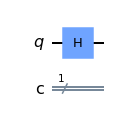

In [3]:
# Creating qubit
qc = QuantumCircuit(1,1)
qc.h(0)
qc.draw()

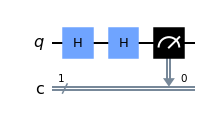

In [4]:
# Measuring in x basis 
qc.h(0)
qc.measure(0,0)
qc.draw()

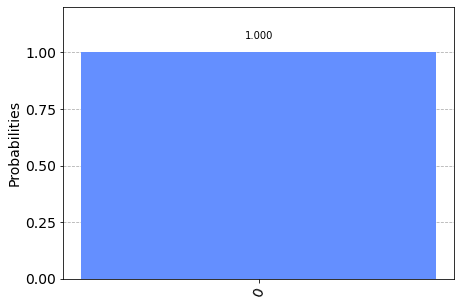

In [5]:
# Simulating circuit on QASM
backend = Aer.get_backend('qasm_simulator') 
job = execute(qc,backend, shots = 1)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

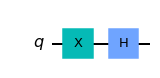

In [ ]:
# Returns encoding qubit given any combination of bits and basis 

bit = 1 #Test case 
basis = 'X' #Test case 
qc = QuantumCircuit(1) 
if basis == 'Z':
    if bit == 0:
        pass 
    elif bit == 1: 
        qc.x(0) 
elif basis == 'X':
    if bit == 0:
        qc.h(0) 
    elif bit == 1: 
        qc.x(0) 
        qc.h(0)
qc.draw()    


QKD Protocol Scaled Implementation



In [7]:
# Step 1: Generating 500 random bits for a test user "Alice"

alice_bits = [] 
    
for i in range(500):   
    alice_bits.append(str(getrandbits(1))) 
print(alice_bits)

['0', '0', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',

In [8]:
# Step 2: Generating 500 random bases for Alice 

alice_bases = [] # List to store Alice's bases
for i in range(500):
    base = getrandbits(1)
    if base == 0:
        alice_bases.append("Z")
    else:
        alice_bases.append("X")

print(alice_bases)

['Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X',

Step 3: Encoding the classical bits into qubits

In [9]:
#BLOCK 6 Encoding qubits for ALice

encoded_qubits = []
for i in range(500):
    qc = QuantumCircuit(1,1)
    if alice_bases[i] == "Z":
        if alice_bits[i] == '0':
            pass 

        elif alice_bits[i] == '1':
            qc.x(0) # Applying an X gate to change the qubit state to |1>
            
    elif alice_bases[i] == "X":
        if alice_bits[i] == '0':
            qc.h(0) # Applying an H gate to change the qubit state to |+>
        elif alice_bits[i] == '1':
            qc.x(0) # Applying an X and H gate to change the qubit state to |->
            qc.h(0)
            
    encoded_qubits.append(qc) # Adding the qubit with the right state to the list of qubits that Alice will send Bob

In [10]:
#Step 4: Bob generates random bases to measure qubits from Alice

bob_bases = []
for i in range(500):
    bit = getrandbits(1)
    if bit == 0:
        bob_bases.append("Z")
    else:
        bob_bases.append("X")

print(bob_bases)

['X', 'X', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'Z', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'Z', 'X', 'X', 'X', 'X', 'Z', 'X',

## Step 6 & 7 - Bob makes measurements and converts qubits into bits

Bob now has to measure the qubits in a the random bases that he chose in Step 5. Can you complete the code to make an X basis measurement?

In [11]:
#Step 5: Bob meaasures qubits to determines bits using raandom bases generated (in the x basis)

bob_bits = [] # List of Bob's bits generated from the results of Bob's measurements
    
for i in range(500):
    qc = encoded_qubits[i]
        
    if bob_bases[i] == "Z": 
            qc.measure(0,0) 
        

    elif bob_bases[i] == "X": 
            qc.h(0) 
            qc.measure(0,0)  
            
            
      # Run circuit that measurements have been aadded to. 
    job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots = 1) 
    results = job.result()
    counts = results.get_counts()
    measured_bit = max(counts, key=counts.get)

        
    bob_bits.append(measured_bit) 
print(bob_bits)

['0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1',

In [12]:
#Step 6: Verify bases between two users

agreeing_indices = []
    
for i in range(len(alice_bases)):
    if alice_bases[i]==bob_bases[i]:
        agreeing_indices.append(i)
    
len(agreeing_indices) #Prints # of bases that are the same between both users 

252

In [13]:
#Step 7: User 1 (Alice) generates keys

alice_key = []
for index in agreeing_indices:
    alice_key.append(alice_bits[index])
    
print(alice_key)

['0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0',

In [14]:
# User 2 (Bob) generates keys

bob_key = []
for index in agreeing_indices:
    bob_key.append(bob_bits[index])

print(bob_key)


['0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0',

In [15]:
#Ste[ 8: Verify that the keys are the same 

print(alice_key == bob_key)

True


## Encryping and decrypting messages

In [16]:
# Functions to use the key to encrypt the secret message and decrypt the message

import binascii

def encrypt_message(unencrypted_string, key):
    # Convert ascii string to binary string
    bits = bin(int(binascii.hexlify(unencrypted_string.encode('utf-8', 'surrogatepass')), 16))[2:]
    bitstring = bits.zfill(8 * ((len(bits) + 7) // 8))
    # created the encrypted string using the key
    encrypted_string = ""
    for i in range(len(bitstring)):
        encrypted_string += str( (int(bitstring[i])^ int(key[i])) )
    return encrypted_string
    
def decrypt_message(encrypted_bits, key):
    # created the unencrypted string using the key
    unencrypted_bits = ""
    for i in range(len(encrypted_bits)):
        unencrypted_bits += str( (int(encrypted_bits[i])^ int(key[i])) )
    # Convert bitstring into
    i = int(unencrypted_bits, 2)
    hex_string = '%x' % i
    n = len(hex_string)
    bits = binascii.unhexlify(hex_string.zfill(n + (n & 1)))
    unencrypted_string = bits.decode('utf-8', 'surrogatepass')
    return unencrypted_string

In [18]:
# Use key to send and receive a secret message

message = "QKD is cool!"
print("Original Messge:", message)
# Call the function encrypt_message with the right inputs
encrypted_message = encrypt_message(message,alice_key)
print("Encrypted message:", encrypted_message)
# Call the function deencrypt_message with the right inputs
decrypted_message = decrypt_message(encrypted_message, bob_key)
print("Decrypted message:", decrypted_message)

Original Messge: QKD is cool!
Encrypted message: 000000100111000010101100111100101110001011110110000100010100101111011011010011001010011011100110
Decrypted message: QKD is cool!
